In [41]:
import pandas as pd
import math
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("gene.csv",index_col = 0)

Text(0, 0.5, 'explained variance ratio(%)')

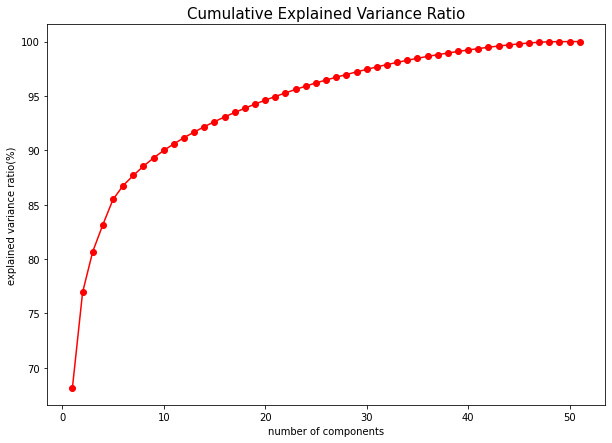

In [3]:
from sklearn.preprocessing import scale
df_norm = scale(data)

pca = PCA(n_components = 'mle')
pca.fit(df_norm)
evr = pca.explained_variance_ratio_ * 100

# 查看累计解释方差比率与主成分个数的关系
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(np.arange(1, len(evr) + 1), np.cumsum(evr), "-ro")
ax.set_title("Cumulative Explained Variance Ratio", fontsize=15)
ax.set_xlabel("number of components")
ax.set_ylabel("explained variance ratio(%)")

Text(0, 0.5, 'explained variance ratio(%)')

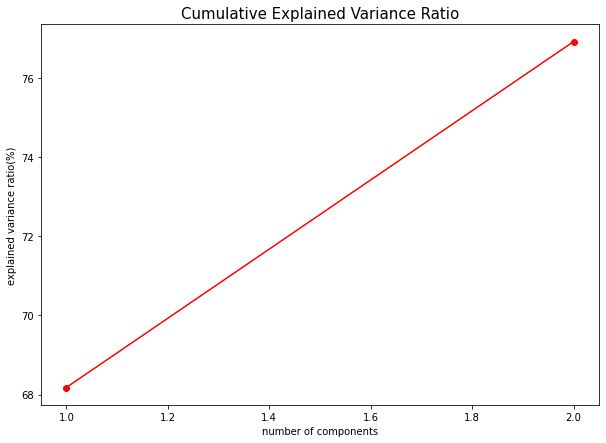

In [4]:
# Only project by pc1 and pc2
from sklearn.preprocessing import scale
df_norm = scale(data)

pca = PCA(n_components = 2)
pca.fit(df_norm)
evr = pca.explained_variance_ratio_ * 100

# 查看累计解释方差比率与主成分个数的关系
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(np.arange(1, len(evr) + 1), np.cumsum(evr), "-ro")
ax.set_title("Cumulative Explained Variance Ratio", fontsize=15)
ax.set_xlabel("number of components")
ax.set_ylabel("explained variance ratio(%)")

In [5]:
pca_df = pca.transform(df_norm)
pca_df.shape

(23684, 2)

In [30]:
u = pca.components_.reshape([52,2])

In [32]:
z = u.T.dot(data_norm.T)
df_approx = u.dot(z).reshape(data_norm.shape)

In [42]:
df_res = pd.DataFrame(data=(data_norm-df_approx),index = data.index, columns = data.columns)

In [44]:
df_res

,CY58_1_CD45_F08_S1028_comb,CY58_1_CD45_A05_S965_comb,CY58_1_CD45_D01_S997_comb,cy80.Cd45.pos.Pd1.neg.S293.E05.S293.comb,cy82.CD45.pos.3.A07.S7.comb,cy82.CD45.pos.3.B08.S20.comb,cy53.1.CD45.pos.2.A04.S964.comb,cy53.1.CD45.pos.1.D01.S37.comb,cy53.1.CD45.pos.2.B08.S980.comb,cy53.1.CD45.pos.1.F04.S64.comb,...,cy60_1_cd_45_pos_3_C04_S316_comb,CY89FNA_A03_S195_comb,CY88CD45POS_2_F07_S451_comb,CY88CD45_150813_D05_S329_comb,CY88CD45POS_2_G06_S462_comb,CY94CD45POS_1_E04_S148_comb,CY88CD45POS_2_F09_S453_comb,CY84_PRIM_POS_All_7_E07_S247_comb,CY84_PRIM_POS_All_7_B06_S210_comb,CY84_PRIM_POS_All_8_E10_S154_comb
C9orf152,-0.046124,-3.545455,-0.062904,0.006041,-0.010713,-0.009014,-0.043557,-0.075699,-0.017701,-0.044791,...,-0.100306,-0.008015,-0.029219,-0.162966,-0.033382,0.008594,-0.022169,-0.000458,0.015679,0.007504
RPS11,9.229329,8.760094,2.113379,2.894422,0.841377,5.114128,7.937011,4.039091,17.063287,7.272768,...,4.690430,2.870081,7.721619,7.468801,10.606953,7.092032,3.268144,-0.087569,1.324649,3.287528
ELMO2,1.229986,-0.047597,-0.042117,-0.079039,0.003833,0.149355,-0.027639,-0.025661,0.089242,-0.022666,...,-0.060442,-0.007436,1.495882,0.004034,-0.033106,-0.000725,-0.053493,0.000876,1.008937,0.007504
CREB3L1,-0.083160,-0.047343,-0.029355,0.004054,0.003833,-0.009014,-0.027639,-0.319358,-0.005476,-0.022666,...,-0.066950,-0.008015,-0.029219,-0.039867,-1.895372,-0.005872,-0.065158,-0.080862,0.015679,0.000507
PNMA1,-0.047904,-0.194464,-0.029355,0.006041,0.003833,-0.051430,-0.027639,-0.025661,-0.015605,-0.021795,...,-0.279918,-0.453478,0.134519,-0.025650,-0.095168,-0.000725,-0.022169,0.001613,-0.015114,0.007504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PIK3IP1,-0.004923,-0.110035,0.011759,0.046942,-0.391364,0.125776,0.013475,0.015452,0.025508,1.672937,...,1.519068,1.311715,0.006254,0.015464,3.764085,0.278102,0.018945,1.979106,1.358520,0.048618
SNRPD2,-0.004923,1.915005,-0.445617,-0.275640,0.034246,0.032100,-0.450615,1.185483,0.989735,0.942307,...,1.224144,0.204571,-0.397037,-0.189278,0.007732,-0.102243,1.129362,-0.001573,0.364812,0.046552
SLC39A6,-0.004923,-0.006230,0.011759,-0.104715,0.044947,0.032100,-0.297375,-0.220616,0.025508,0.086691,...,-0.147645,0.033098,-0.085741,0.015464,-12.425810,-0.153179,0.614082,-0.029935,0.038689,0.047449
CTSC,0.431394,2.368555,0.766325,1.223353,0.041232,1.909604,0.620502,1.800894,0.088629,2.485801,...,0.736820,0.174169,0.066299,0.053153,-0.330083,0.022739,0.181769,0.113319,0.121488,-0.108214


<AxesSubplot:>

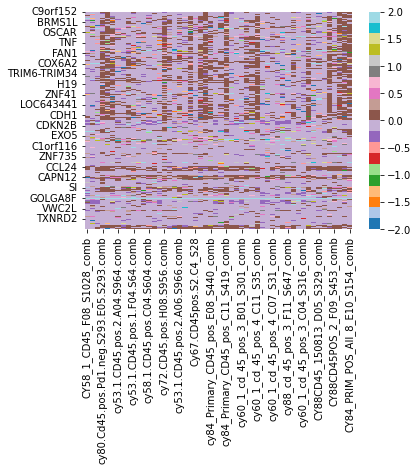

In [51]:
sns.heatmap(df_res, annot=False, vmin=-2, vmax=2, cmap="tab20")

<AxesSubplot:>

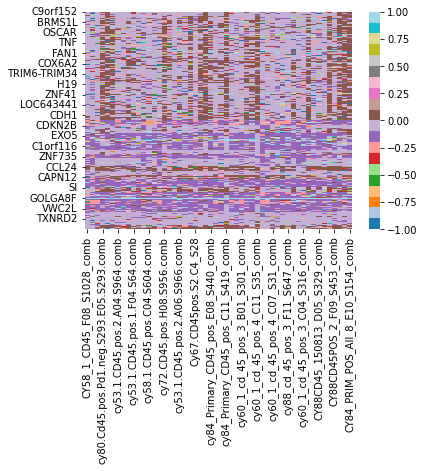

In [50]:
sns.heatmap(df_res, annot=False, vmin=-1, vmax=1, cmap="tab20")

## Binary MF